In [142]:
#import python library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from scipy.stats import median_test,stats

In [120]:
#url path of dataset 
url = r'C:\Users\goura\Downloads\dataset1-master (1)\dataset1-master\abalone.csv'
abalone = pd.read_csv(url)

In [121]:
#check first 5 data 
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [122]:
#check last 5 data 
abalone.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [123]:
#information about dataset
print('information about dataset\n')
abalone.info()

information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [124]:
#information about dataset
print('describe about dataset')
abalone.describe()

describe about dataset


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [125]:
#check unique value in sex column
abalone.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

<AxesSubplot:title={'center':'Total number of abalone data represented by sex'}, xlabel='Sex'>

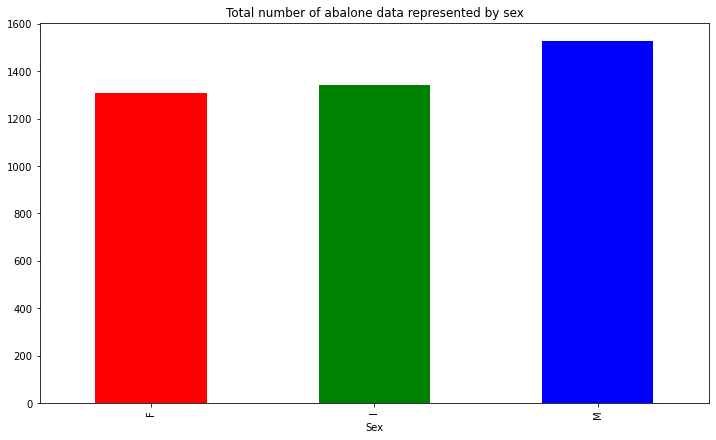

In [126]:
#check Total number of abalone data represented by sex
colors=['r','g','b']
abalone.groupby('Sex').size().plot.bar(title='Total number of abalone data represented by sex',color=colors)

In [127]:
abalone['Sex'] = abalone['Sex'].map({'M': 2, 'F': 1, 'I':0})
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [128]:
sexes = pd.unique(abalone.Sex.values)
aba_data = {sex:abalone['Length'][abalone.Sex == sex] for sex in sexes}

In [129]:
aba_df=pd.DataFrame({"Male":aba_data[2].tolist()[0:1307],"Female":aba_data[1].tolist()})
aba_df#print male female deta


,Male,Female
0,0.455,0.530
1,0.350,0.530
2,0.440,0.545
3,0.475,0.550
4,0.430,0.525
...,...,...
1302,0.535,0.585
1303,0.570,0.585
1304,0.575,0.515
1305,0.580,0.565


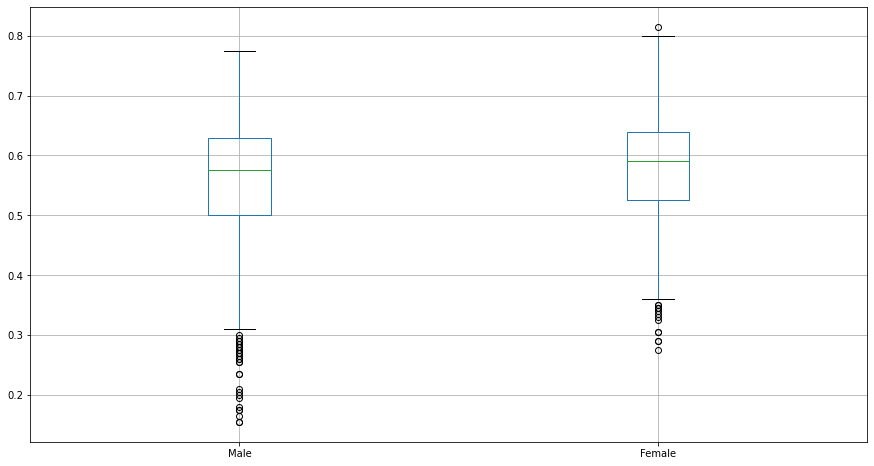

In [130]:
# # draw boxplot to show the shape of distribution
plt.figure(figsize=(15,8))
boxplot = aba_df.boxplot(column=['Male', 'Female'])

In [131]:
#calculate mean and std
sex_val = {'Male_mean': aba_data[2].mean(), 'Male_std': aba_data[2].std(),'Female_mean': aba_data[1].mean(), 'Female_std': aba_data[1].std()}
df = pd.DataFrame(data=sex_val,index=[0])
df.head() 

,Male_mean,Male_std,Female_mean,Female_std
0,0.561391,0.102697,0.579093,0.08616


In [132]:
from scipy.stats import ttest_ind,stats
# use Anova test to test for p value
f, p = stats.f_oneway(aba_data[2],aba_data[1])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  8.987874966189928e-07
reject null hypothesis


In [133]:
# use T test to reprove the result
ttest,pval = ttest_ind(aba_data[2],aba_data[1])
print("p-value for significance is: ",pval)                       
#print(aba_data[2].mean(),aba_data[1].mean(),aba_data[2].std(),aba_data[1].std())                     
if pval < 0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p-value for significance is:  8.987874966212848e-07
we reject null hypothesis


In [135]:
#calculate the mean rings of both
aba_rings = {sex:abalone['Rings'][abalone.Sex == sex] for sex in sexes}
aba_rings[1].median()

10.0

In [136]:
aba_rings[2].median()

10.0

In [137]:
aba_male=abalone[abalone['Sex']==2]
aba_female=abalone[abalone['Sex']==1]

<AxesSubplot:title={'center':'Male hist'}, ylabel='Frequency'>

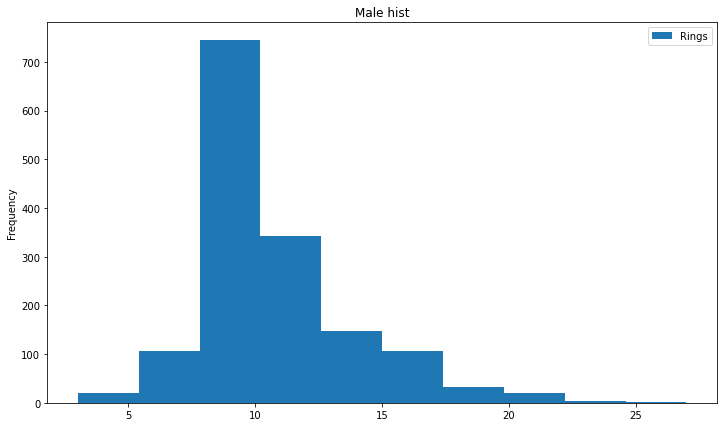

In [138]:
#male hist 
plt.rcParams["figure.figsize"] = (12,7)
aba_male["Rings"].plot(kind='hist', legend=True,title='Male hist')

<AxesSubplot:title={'center':'Female hist'}, ylabel='Frequency'>

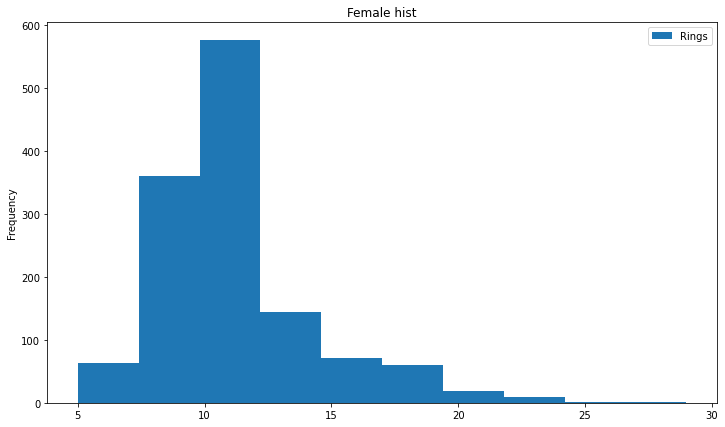

In [139]:
#femal hist
aba_female["Rings"].plot(kind='hist', legend=True,title='Female hist')

In [143]:
u_statistic, pval = stats.mannwhitneyu(aba_male['Rings'], aba_female['Rings'])
print("P value is:",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

P value is: 6.689638084926974e-05
 we are rejecting null hypothesis


In [144]:
stat, p, med, tbl = median_test(aba_male['Rings'], aba_female['Rings'])
print("P value is:",p, "and the median is",med)
if pval < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

P value is: 0.0032854772243561072 and the median is 10.0
 we are rejecting null hypothesis


<function matplotlib.pyplot.show(close=None, block=None)>

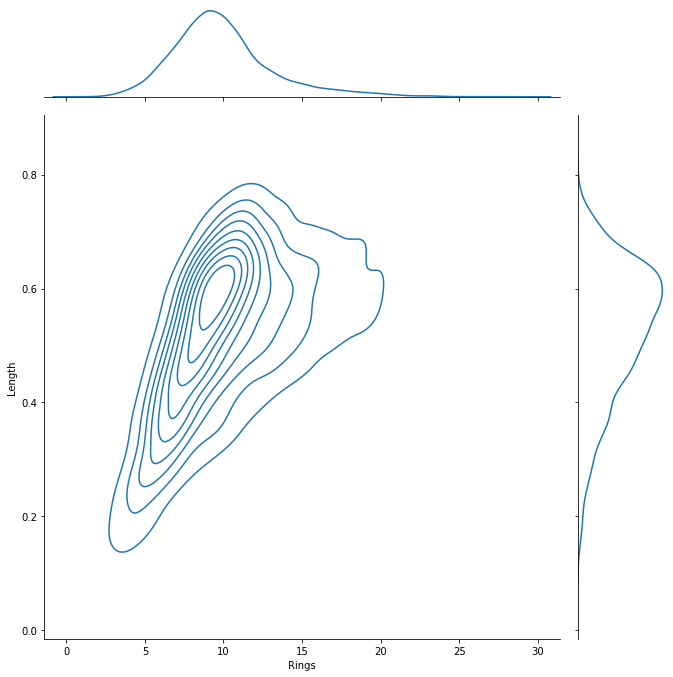

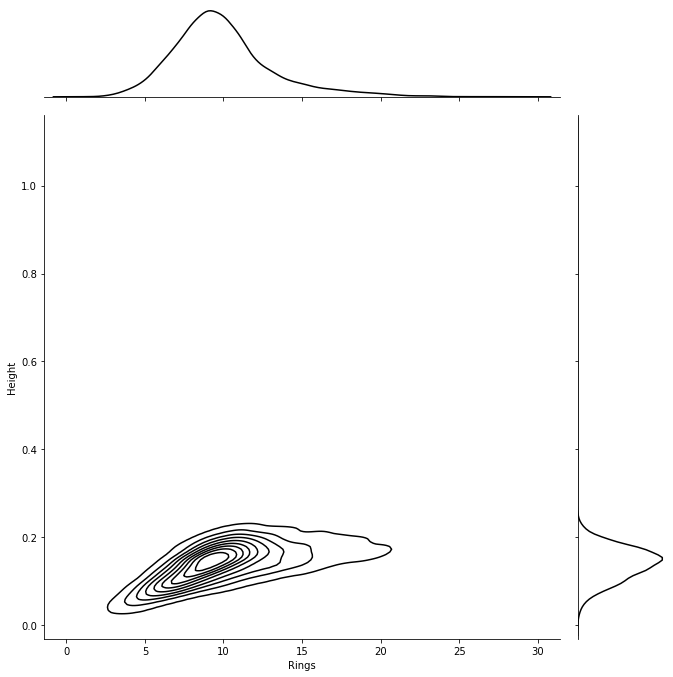

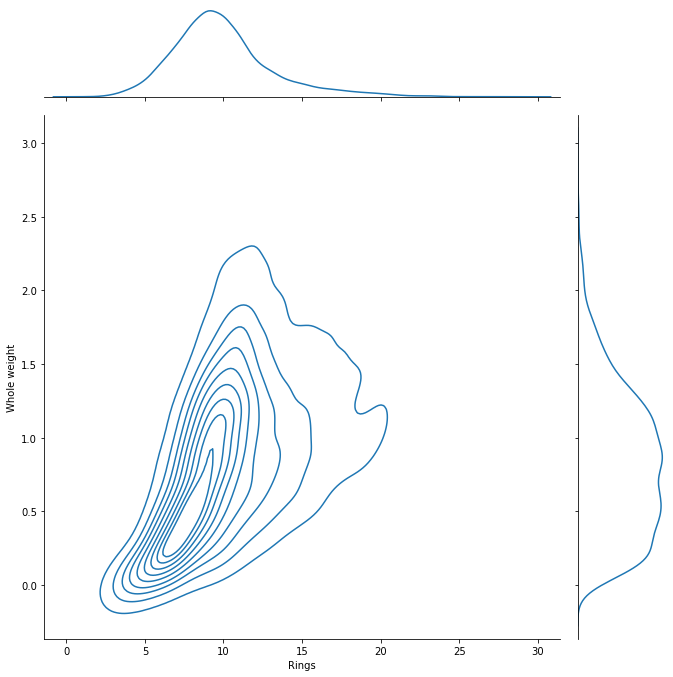

In [147]:
aba_sns = sns.jointplot(data=abalone, x='Rings', y='Length',kind='kde')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone, x='Rings', y='Height', kind='kde',color='k')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)
aba_sns = sns.jointplot(data=abalone, x='Rings', y='Whole weight', kind='kde')
aba_sns.fig.set_figwidth(10)
aba_sns.fig.set_figheight(10)


In [148]:
#calculate the median rings of infant
aba_rings = {sex:abalone['Rings'][abalone.Sex == sex] for sex in sexes}
aba_rings[0].median()

8.0

# Multiple Linear Regression 

In [188]:
# try to use Multiple Linear Regression 
maba_y = pd.DataFrame(abalone.Rings)
maba_x =pd.DataFrame(abalone[abalone.columns[0:7]])

In [ ]:
#drop sex columns in this data frame
aba_x = aba_x.drop(['Sex'],axis=1)

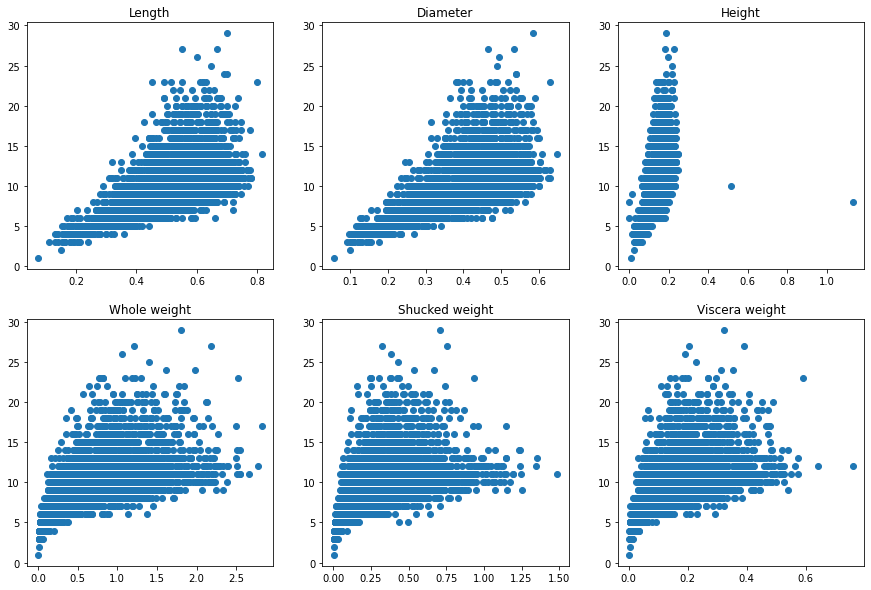

In [202]:
# show the separate relationship figures of each element with Rings
fig = plt.figure(figsize=(15,10))
i=1
for col in aba_x.columns:
    ax = fig.add_subplot(2,3,i)
    i=i+1
    plt.scatter(aba_x[col], aba_y.Rings)
    ax.set_title(aba_x[col].name)

Text(0, 0.5, 'Predictions')

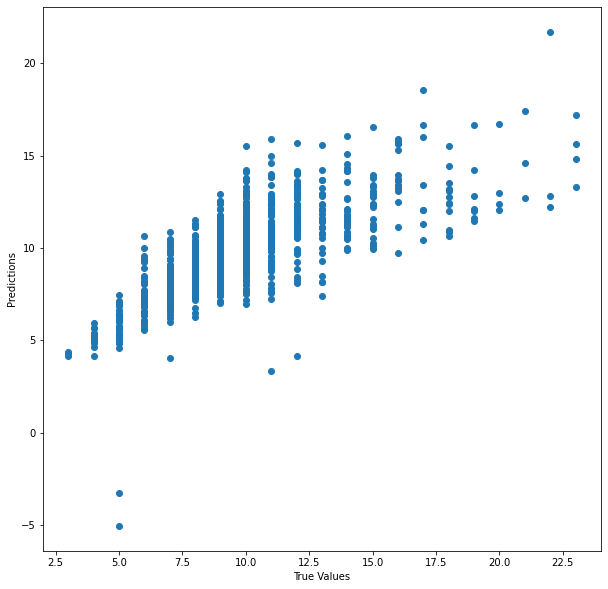

In [203]:
# instantiate the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=4)

# train
mabax_train, mabax_test, mabay_train, mabay_test = train_test_split(maba_x, maba_y, 
                                                   test_size=0.2, 
                                                   random_state=42)
fit = model.fit(mabax_train, mabay_train) 

# make predictions
mpreds = model.predict(mabax_test)
## plot predicted vs actual
plt.figure(figsize=(10,10))
plt.scatter(mabay_test, mpreds) 
plt.xlabel("True Values")
plt.ylabel("Predictions")

# OLS Regression Results 

In [204]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(maba_x)
est = sm.OLS(maba_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:34:08   Log-Likelihood:                -9245.2
No. Observations:                4177   AIC:                         1.851e+04
Df Residuals:                    4169   BIC:                         1.856e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6581      0.265     10.

# Mean Absolute Erro

In [205]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(mabay_test, mpreds)
MAE

1.6021467380491177

In [206]:
#RMSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(mabay_test, mpreds)
RMSE = np.sqrt(MSE) 
RMSE

2.245052108893286

In [207]:
#R2 Score- Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(mabay_test, mpreds)

0.5343961964308853

# Linear Regression

In [208]:
#Creating a Simple Linear Regression
r_sq = abalone[["Length", "Rings"]].corr() 
#Calculating Slope (B1)
import numpy as np
B1 = r_sq.values[0][1] * (np.std(abalone.Rings)/np.std(abalone["Length"]))
print("For 1 unit of change in Length, we can predict {} units of change in Rings".format(B1))

For 1 unit of change in Length, we can predict 14.946410917580248 units of change in Rings


In [209]:
#Calculating the Intercept
B0 = abalone.Rings.mean() - (B1 * abalone["Length"].mean())
B0

2.101883224450159

Text(0.5, 0, 'Independent Variable')

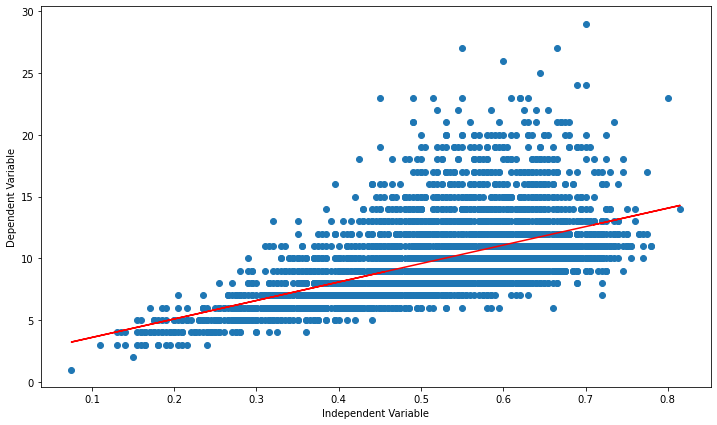

In [210]:
#Plotting the line of best fit
plt.rcParams["figure.figsize"] = (12,7)
abalone["Rings_line"] = B0 + (B1 * abalone["Length"])
plt.scatter(abalone["Length"],abalone.Rings) # create the main scatter plot
plt.plot(abalone["Length"], abalone.Rings_line,c='r') # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

In [211]:
#Split into Training and Test Sets
from sklearn.model_selection import train_test_split
aba_y = pd.DataFrame(abalone.Rings)
aba_x =pd.DataFrame(abalone["Length"])
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, test_size=0.2, random_state=42)

In [212]:
#Instantiating the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)
fit = lr.fit(abax_train, abay_train)
#intercept
lr.intercept_

array([2.15563254])

In [213]:
#Coefficients
coef_aba = pd.DataFrame({"feature": "Length", 
                        "coeff": int(fit.coef_)},
                      index=[0])
coef_aba

,feature,coeff
0,Length,14


Text(0, 0.5, 'Predictions')

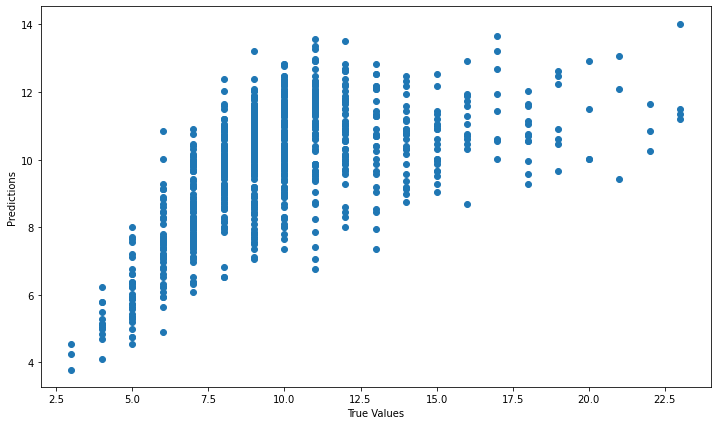

In [214]:
#Making predictions
preds = lr.predict(abax_test)

## plot predicted vs actual
plt.scatter(abay_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

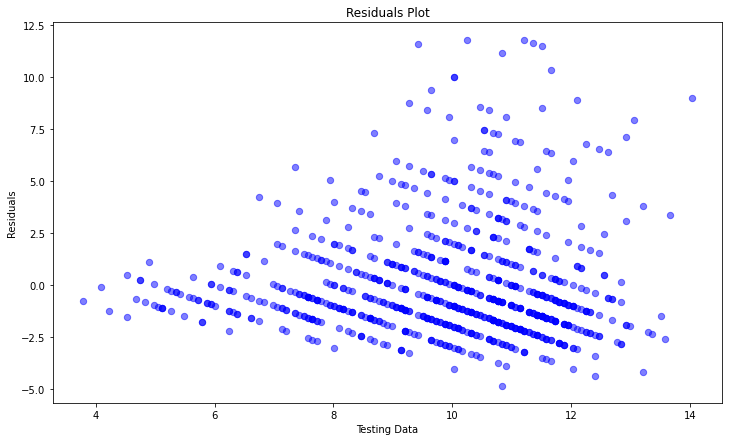

In [215]:
#Checking Random Error and plot residuals
residuals = abay_test - preds
plt.scatter(lr.predict(abax_test), residuals,
            c='b', s=40, alpha=0.5)
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [220]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(aba_x)
est = sm.OLS(aba_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:39:27   Log-Likelihood:                -10042.
No. Observations:                4177   AIC:                         2.009e+04
Df Residuals:                    4175   BIC:                         2.010e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1019      0.186     11.328      0.0

In [221]:
aba_infant=abalone[abalone['Sex']==0]
aba_infant.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Rings_line
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,7.034199
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8.454108
16,0,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,7.407859
21,0,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10,7.781519
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5,5.689022


In [222]:
aba_y = pd.DataFrame(aba_infant.Rings)
aba_x =pd.DataFrame(aba_infant.Length)

In [223]:
#Creating a Simple Linear Regression
r_sq = aba_infant[["Length", "Rings"]].corr() 
r_sq

,Length,Rings
Length,1.000000,0.685997
Rings,0.685997,1.000000


In [224]:
import numpy as np
B1 = r_sq.values[0][1] * (np.std(aba_infant.Rings)/np.std(aba_infant["Length"]))
print("For 1 unit of change in Shell weight, we can predict {} units of change in Rings".format(B1))

For 1 unit of change in Shell weight, we can predict 15.827255747740896 units of change in Rings


In [225]:
B0 = aba_infant.Rings.mean() - (B1 * aba_infant["Length"].mean())
B0

1.120418216725457

<ipython-input-226-67e67f1fffda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aba_infant["Rings_infant_line"] = B0 + (B1 * aba_infant["Length"])


Text(0.5, 0, 'Independent Variable')

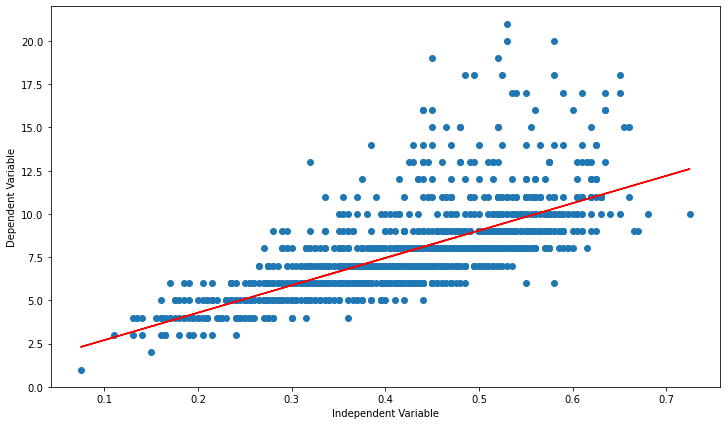

In [226]:
#Plotting the line of best fit
plt.rcParams["figure.figsize"] = (12,7)
aba_infant["Rings_infant_line"] = B0 + (B1 * aba_infant["Length"])
plt.scatter(aba_infant["Length"],aba_infant.Rings) # create the main scatter plot
plt.plot(aba_infant["Length"], aba_infant.Rings_infant_line,c='r') # plot the regression line
plt.ylabel("Dependent Variable")
plt.xlabel("Independent Variable")

In [227]:
#Split into Training and Test Sets
from sklearn.model_selection import train_test_split
aba_y = pd.DataFrame(aba_infant.Rings)
aba_x =pd.DataFrame(aba_infant["Length"])
abax_train, abax_test, abay_train, abay_test = train_test_split(aba_x, aba_y, test_size=0.2,  random_state=42)
                                                   
                                                  

In [228]:
#Instantiating the linear model
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True,
                        n_jobs=4)
fit = lr.fit(abax_train, abay_train)
#intercept
lr.intercept_

array([1.32012593])

In [229]:
#Coefficients
coef_aba = pd.DataFrame({"feature": "Length", "coeff": int(fit.coef_)},index=[0])
                      
coef_aba

,feature,coeff
0,Length,15


Text(0, 0.5, 'Predictions')

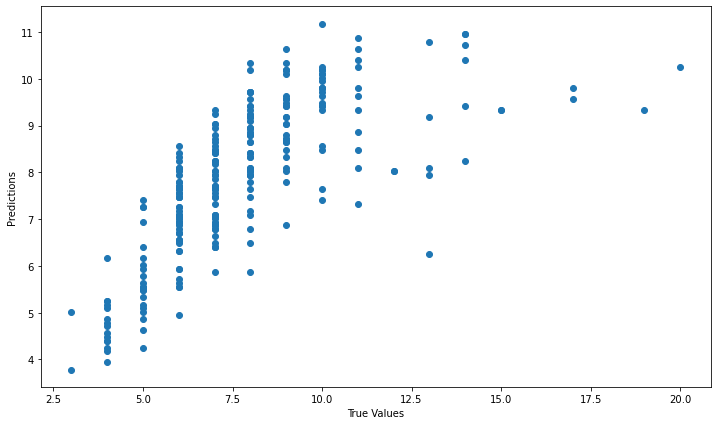

In [230]:
#Making predictions
preds = lr.predict(abax_test)

## plot predicted vs actual
plt.scatter(abay_test, preds) # plotting our known testing labels against our predictions
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0, 0.5, 'Residuals')

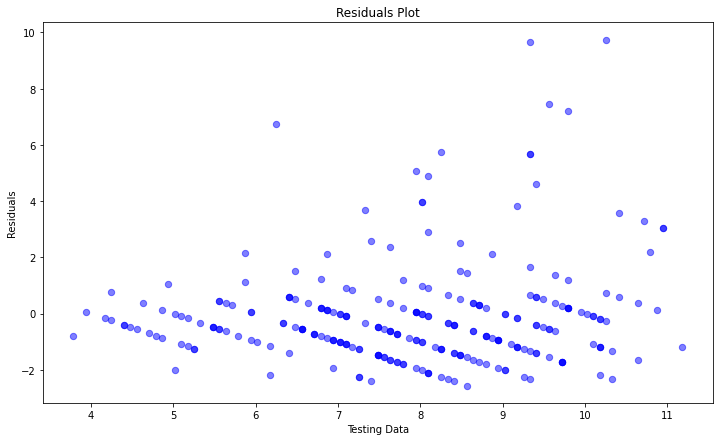

In [231]:
#Checking Random Error and plot residuals
residuals = abay_test - preds
plt.scatter(lr.predict(abax_test), residuals,
            c='b', s=40, alpha=0.5)
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [232]:
#Examine error 
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(abay_test, preds)
MAE

1.2358831316738828

In [233]:
#RMSE

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(abay_test, preds)
RMSE = np.sqrt(MSE) 
RMSE

1.8710425508670894

In [235]:
#R2 Score- Coefficient of Determination
from sklearn.metrics import r2_score
r2_score(abay_test, preds)

0.4899295158723035

In [236]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(aba_x)
est = sm.OLS(aba_y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     1191.
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.76e-187
Time:                        14:42:41   Log-Likelihood:                -2712.8
No. Observations:                1342   AIC:                             5430.
Df Residuals:                    1340   BIC:                             5440.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1204      0.202      5.535      0.0

In [237]:
aba_infant=abalone[abalone['Sex']==0]
aba_infant.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Rings_line
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,7.034199
5,0,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,8.454108
16,0,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.115,7,7.407859
21,0,0.380,0.275,0.100,0.2255,0.0800,0.0490,0.085,10,7.781519
42,0,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.020,5,5.689022


In [246]:
from sklearn.preprocessing import MinMaxScaler
aba_out=pd.DataFrame(aba_infant[aba_infant.columns[0:7]])
min_max_scaler = MinMaxScaler()
# Create an object to transform the data to fit minmax processor
df_minmax_array = min_max_scaler.fit_transform(aba_out)
df_minmax = pd.DataFrame(df_minmax_array, columns=aba_out.columns)
df_minmax.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight
0,0.0,0.392308,0.404040,0.363636,0.099145,0.114563,0.088636
1,0.0,0.538462,0.494949,0.431818,0.170696,0.181230,0.175000
2,0.0,0.430769,0.454545,0.386364,0.140904,0.121683,0.088636
3,0.0,0.469231,0.444444,0.454545,0.109158,0.102265,0.110227
4,0.0,0.253846,0.242424,0.204545,0.033211,0.039482,0.052273


((array([-3.28145241, -3.02252307, -2.87842386, ...,  2.87842386,
          3.02252307,  3.28145241]),
  array([0.        , 0.        , 0.04545455, ..., 0.90909091, 0.97727273,
         1.        ])),
 (0.1454593051199675, 0.49088876845955837, 0.9984134390096683))

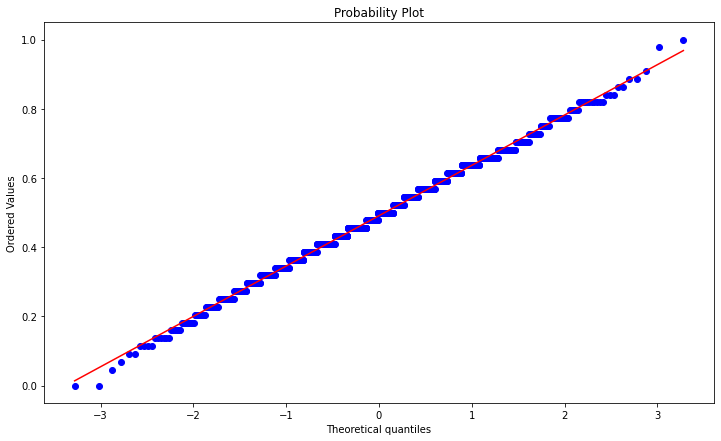

In [247]:
# in QQ plot, it looks Gaussian

stats.probplot(df_minmax["Height"], dist="norm", plot=plt)

In [248]:
from scipy.stats import normaltest
from sklearn import datasets
k2_stat, p = normaltest(df_minmax["Height"])
print(df_minmax["Length"].name,":K^2 Stat= {}, Pvalue= {}".format(k2_stat, p))
alpha = 0.05 
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Length :K^2 Stat= 1.145544986414679, Pvalue= 0.5639596947723188
Sample looks Gaussian (fail to reject H0)


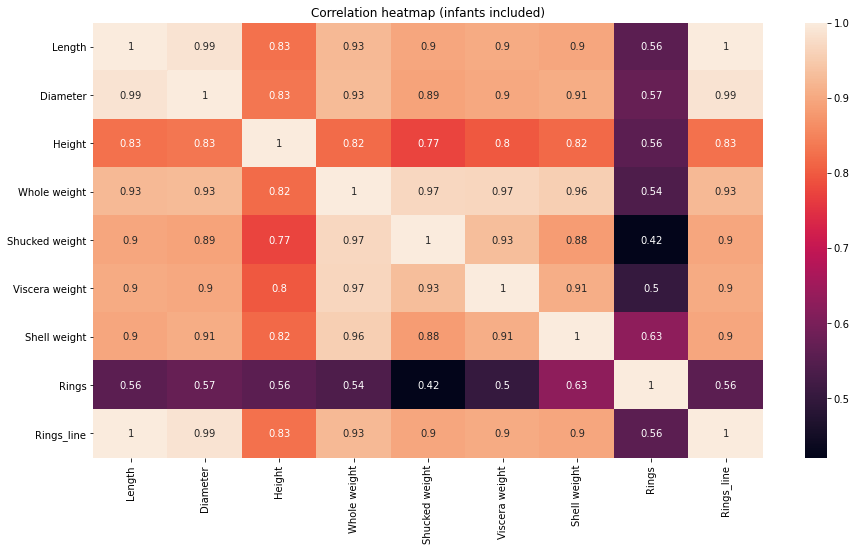

In [216]:
#Correlation heatmap (infants included)
corr_df = abalone.drop(columns=['Sex'])

plt.figure(figsize=(15, 8))
corr = corr_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap (infants included)')
plt.show()

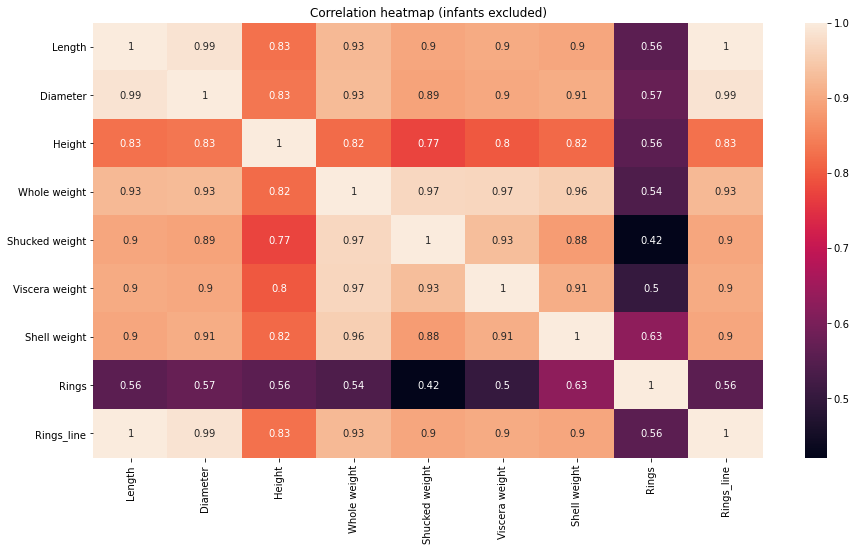

In [219]:
# Correlation heatmap (infants excluded)
corr_df = abalone.loc[abalone.Sex!='I'].drop(columns=['Sex'])

plt.figure(figsize=(15, 8))
corr = corr_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation heatmap (infants excluded)')
plt.show()